In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
df = pd.read_csv("LogiReg_data.csv", header=None, names=['exam1', 'exam2', 'admitted'])
df.head(10)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


Text(0, 0.5, 'exam2_score')

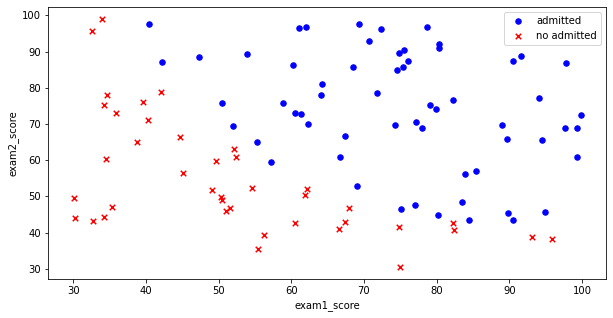

In [3]:
positive = df[df['admitted'] == 1]
negative = df[df['admitted'] == 0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(positive['exam1'], positive['exam2'], s=30, c='b', marker='o', label='admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=30, c='r', marker='x', label='no admitted')
ax.legend()
ax.set_xlabel('exam1_score')
ax.set_ylabel('exam2_score')

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

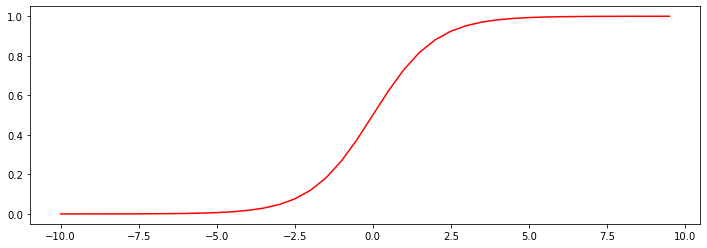

In [5]:
num = np.arange(-10, 10, 0.5)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(num, sigmoid(num), 'r')

In [6]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [10]:
#插入一列值为1，名字为Ones
df.insert(0, 'Ones', 1)
origin = df.values
cols = origin.shape[1]
x = origin[:, 0:cols-1]
y = origin[:, cols-1:cols]
theta = np.zeros([1, 3])
print(y)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [11]:
def cost(x, y, theta):
    left = np.multiply(-y, np.log(model(x, theta)))
    right = np.multiply(1-y, np.log(1-model(x, theta)))
    return np.sum(left - right) / len(x)
cost(x, y, theta)

0.6931471805599453

In [ ]:
def gradient(x, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(x, theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, x[:, j])
        grad[0, j] = np.sum(term) / len(x)
    return grad